**PERKENALAN**


>**NAMA :** Rifqi Julian Hasyari


>**BATCH :**HCK-006




**Conceptual Problems**


1. Jelaskan criterion yang kalian pakai dalam kasus ini !Jelaskan criterion yang kalian pakai dalam kasus ini !


> Parameter untuk memisahkan atribut. Untuk setiap kriteria yang memenuhi syarat, harus dapat mengoptimalkan nilai partisi dari pohon keputusan. Pada model tersebut saya menggunakan GINI atau criterion default yang ada. Kriteria ini mengukur perbedaan antara distribusi properti label. Memisahkan atribut yang dipilih mengarah pada pengurangan indeks Gini rata-rata dari himpunan bagian yang dihasilkan.

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
> pruning adalah pemangkasan pada cabang-cabang yang tidak signifikan atau tidak memberikan kontribusi pada prediksi. Proses pruning bertujuan untuk menghindari overfitting atau kelebihan fitting pada model decision tree.


*   Pre-pruning adalah jenis pemangkasan yang dilakukan selama proses pembuatan pohon keputusan. Pemangkasan ini mencegah pohon tumbuh dengan membatasi kondisi tertentu.
*   Postpruning adalah jenis pembersihan yang dilakukan setelah pohon keputusan dibangun sepenuhnya. Pada langkah ini, kami melihat setiap simpul pohon dan memutuskan apakah akan memangkas atau menghapus cabang yang tidak memberikan utilitas signifikan untuk generalisasi pohon.


3. Bagaimana cara memilih K yang optimal pada KNN ?
>salah satau cara memilih k yang optimal adalah dengan menggunakan cross validation ataupun elbow methode dan juga dapat menggunakan hyperparameter tuning.

4. Jelaskan apa yang dimaksud dengan Cross Validation !
>Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dengan membagi data menjadi dua subset, yaitu data proses pembelajaran dan data validasi/evaluasi. Subset pembelajaran melatih dan memvalidasi model atau algoritme. Selain itu, pemilihan tipe CV bisa berdasarkan ukuran dataset.

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?


*   Akurasi adalah rasio jumlah prediksi yang benar dengan jumlah total prediksi. Metrik ini mengukur kemampuan model untuk membuat prediksi yang umumnya benar. Namun, akurasi bisa menyesatkan ketika ada ketidakseimbangan kelas dalam kumpulan data.
*   Recall (juga dikenal sebagai sensitivitas atau true positive rate) mengukur sejauh mana model dapat sepenuhnya mengidentifikasi semua contoh positif dalam kumpulan data. Metrik ini berfokus pada tingkat kebenaran positif yang ditemukan oleh model dan memberikan informasi tentang seberapa baik model menemukan kelas yang diminati secara keseluruhan.
*   Precision (presisi) mengukur sejauh mana prediksi positif yang dilakukan oleh model adalah benar. Metrik ini fokus pada tingkat kebenaran prediksi positif dan mengukur seberapa baik model dapat mengidentifikasi dengan tepat kelas yang diminati. Precision memberikan informasi tentang seberapa rendahnya tingkat kesalahan prediksi positif.

*  Skor F1 menggabungkan presisi dan daya ingat untuk memberikan ukuran performa model yang seimbang. Skor F1 adalah rata-rata harmonik presisi dan daya ingat yang memperhitungkan kedua metrik secara setara. Skor F1 berguna ketika ada ketidakseimbangan antara kelas positif dan negatif dalam kumpulan data.



> Akurasi digunakan ketika data kita balance, presisi digunakan ketika kita ingin meminimalisir false positive yang kita punya, recall digunakan ketika kita ingin meminimalisir false negative yang kita punya, dan f1 skor digunakan ketika kita tidak tau ingin meminimalisir false yang mana maka dari itu menggunakan f1 score.







# **SQL**

In [1]:
#menghubungkan dengan google cloud untuk mengammbil dataset
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')
project_id = "gc1-rifqijulianhasyari" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


In [2]:
#Mengumpulkan data dari dataset yang ada di google cloud dengan menggunakan bahasa SQL
Data = client.query('''
SELECT
  limit_balance,
  CAST(sex AS INTEGER) AS sex,
  CAST(education_level AS INTEGER) AS education_level,
  CAST(marital_status AS INTEGER) AS marital_status,
  age,pay_0,pay_2,pay_3,pay_4,
  CAST(pay_5 AS FLOAT64) AS pay_5,
  CAST(pay_6 AS FLOAT64) AS pay_6,
  bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,
  bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,
  pay_amt_5,pay_amt_6,
  CAST(default_payment_next_month AS INTEGER) AS default_payment_next_month
FROM
  bigquery-public-data.ml_datasets.credit_card_default
LIMIT 20000

''').to_dataframe()
Data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


# **IMPORT LIBRARIES**

In [3]:
!pip install phik
!pip install feature_engine

In [4]:
import pandas as pd
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor





# **Data Cleaning**

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   Int64  
 2   education_level             2965 non-null   Int64  
 3   marital_status              2965 non-null   Int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Berdasarkan data info diatas kita dapat melihat bahwa semua data sudah berupa numerik yaitu fload dan INT.

In [6]:
Data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


Berdasarkan output diatas dapat dilihat bahwa data yang kita miliki adalah sebesar 2965 baris dan 24 kolom yang nantinya akan kita bersihkan dan kita process agar dataset tersebut siap digunakan untuk melakukan pemodelan.

In [7]:
Data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Berdasarkan output diatas dapaat kita lihat bahwa tidak terdapat nilai missing value sehingga kita tidak perlu malakukan handling missing value.

In [8]:
num_col = Data.describe().columns.tolist()

In [9]:
# numeric overview
Data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.3086,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.18363,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.18516,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Berdasarkan output diatas kita bisa melihat mulai dari nilai rata2 hingga nilai max yang ada pada setiap kolom yang ada di datafreame.
 >pada kolom limit balance menunjukan bahwa rata2 limit balance dari pengguna sebesar 163369 dengan nilai minimal sebesar 10000 dan terbesar yaitu 800000.

> Pada kolom bill_amt terdapat nilai mines asumsi saya ini dikarenakan terdapat orang yang melebihi limit dari kredit tersebut.


# **EDA FOR ANALYSIS**

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


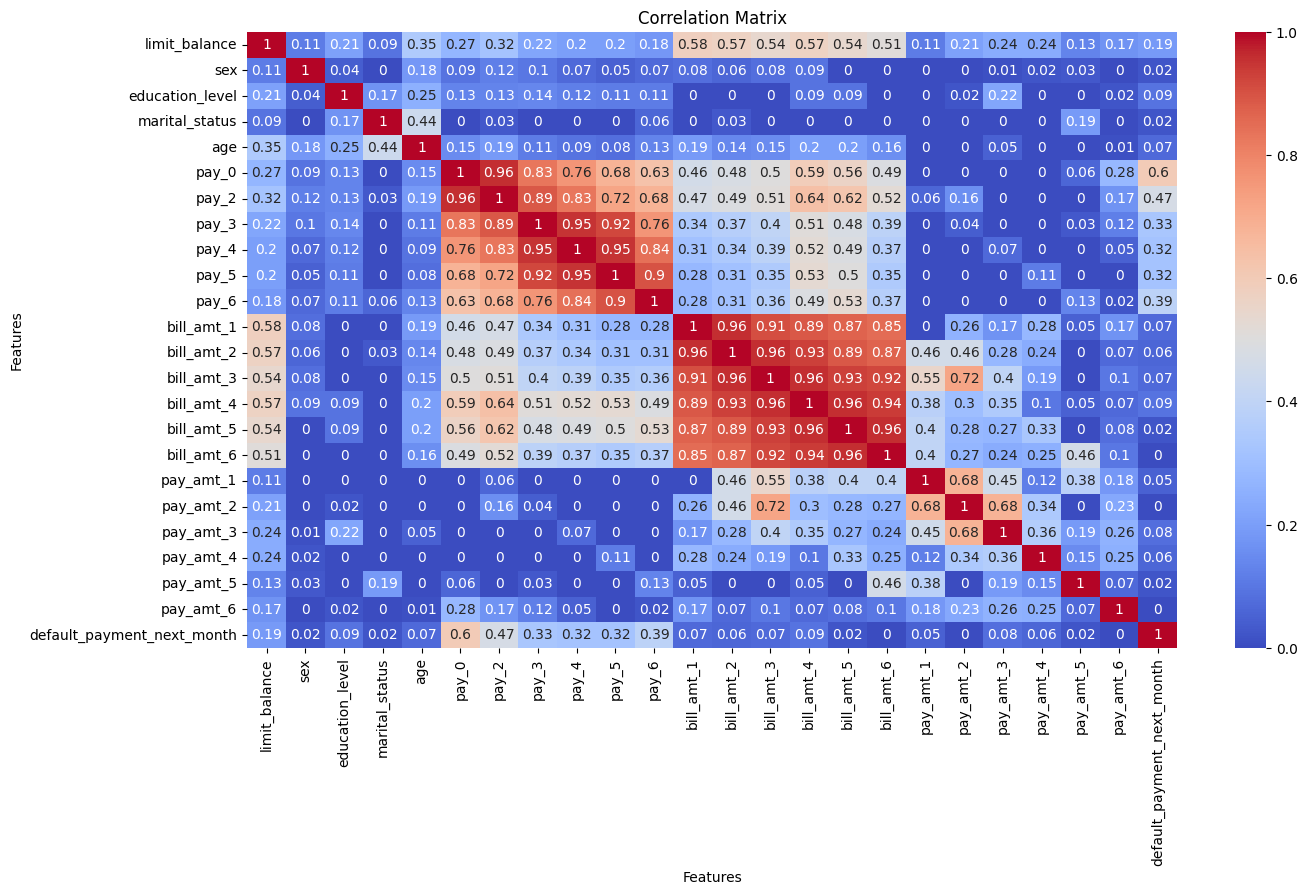

In [10]:
# Assuming you already have the 'phik_overview' correlation matrix
phik_overview = Data.phik_matrix()

# Round the correlation values to two decimal places
phik_overview_rounded = phik_overview.round(2)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(phik_overview_rounded, annot=True, cmap='coolwarm', vmin=0, vmax=1, xticklabels=phik_overview.columns, yticklabels=phik_overview.index)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Output diatas menggambarkan korelasi atau hubungan tiap kolom yang nantinya akan dipilih untuk menajadi sebuah fitur di model. Dapat dilihat bahwa terdapat kolom2 yang memiliki nilai korelasi diatas 0,1 yang nanti nya akan menjadi fitur untuk melakukan pemodelan yaitu fitur limit balance serta fitur pay_0 hingga pay_6.

In [11]:
# Membuat kolom baru dengan inisialisasi nilai kosong
Data['age_group'] = ""

# Melakukan loop untuk setiap baris dalam DataFrame
for index, row in Data.iterrows():
    age = row['age']
    # Mengelompokkan umur berdasarkan rentang
    if 20 <= age <= 30:
        Data.at[index, 'age_group'] = 'Milenial'
    elif 31 <= age <= 50:
        Data.at[index, 'age_group'] = 'Dewasa'
    elif 51 <= age <= 80:
        Data.at[index, 'age_group'] = 'Orang Tua'

# Menampilkan hasil
print(Data[['age', 'age_group']].head())

    age  age_group
0  54.0  Orang Tua
1  49.0     Dewasa
2  22.0   Milenial
3  33.0     Dewasa
4  32.0     Dewasa


Kode diatas berfungsi untuk membuat kolom baru bernama age_group yang berisikan kategorikal untuk kolom age dengan kondisi 20-30 adalah millenial,31-50 dewasa dan 51-80 adalah orang tua. Kolom ini dibuat hanya untuk kepentingan analysis dan dibuat visualisasinya.

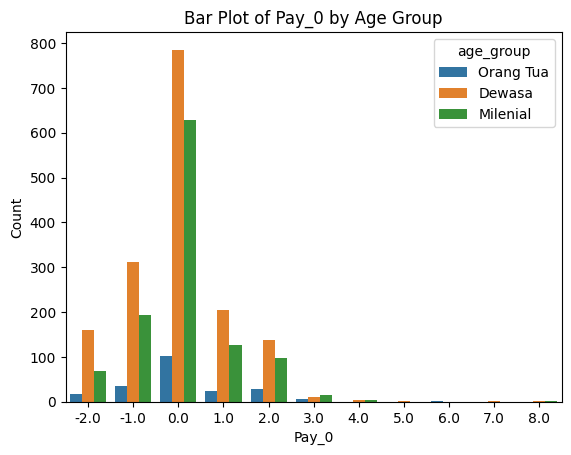

In [12]:
# Menggabungkan kolom "age_group" dan "pay_0" menjadi DataFrame baru
data_plot = pd.concat([Data['age_group'], Data['pay_0']], axis=1)

# Membuat bar plot dengan sumbu x dan hue yang ditukar
sns.countplot(x="pay_0", hue="age_group", data=data_plot)

# Menambahkan label dan judul
plt.xlabel("Pay_0")
plt.ylabel("Count")
plt.title("Bar Plot of Pay_0 by Age Group")

# Menampilkan plot
plt.show()

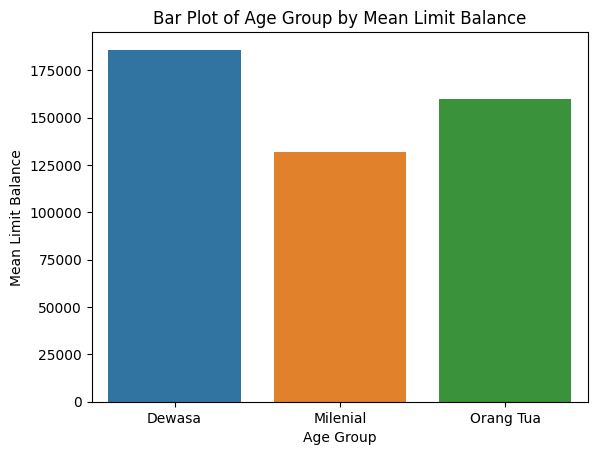

In [13]:
# Menggabungkan kolom "age_group" dan "limit_balance" menjadi DataFrame baru
data_plot = pd.concat([Data['age_group'], Data['limit_balance']], axis=1)

# Menghitung nilai rata-rata pada kolom "limit_balance" berdasarkan "age_group"
mean_balance = data_plot.groupby('age_group')['limit_balance'].mean().reset_index()

# Membuat bar plot
sns.barplot(x='age_group', y='limit_balance', data=mean_balance)

# Menambahkan label dan judul
plt.xlabel("Age Group")
plt.ylabel("Mean Limit Balance")
plt.title("Bar Plot of Age Group by Mean Limit Balance")

# Menampilkan plot
plt.show()

Pada kolom tersebut menunjukan rata2 limit balance yang ada di setiap group umur. Dapat dilihat bahwa limit_balance yang ada pada kategori dewasa memiliki limit tertinggi, disusul oleh orang tua dan milenial memiliki limit rata2 paling rendah.

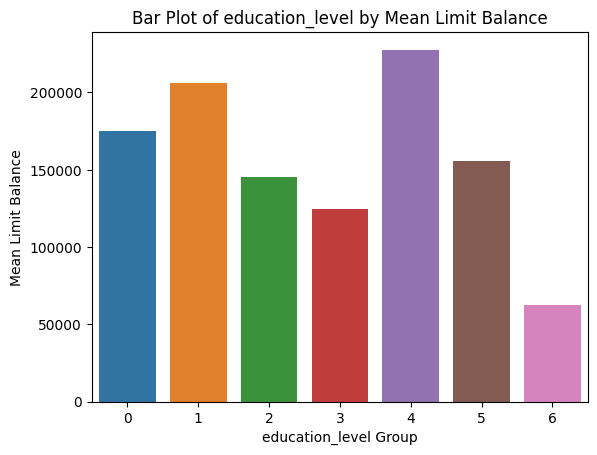

In [14]:
# Menggabungkan kolom "age_group" dan "limit_balance" menjadi DataFrame baru
data_plot = pd.concat([Data['education_level'], Data['limit_balance']], axis=1)

# Menghitung nilai rata-rata pada kolom "limit_balance" berdasarkan "age_group"
mean_balance = data_plot.groupby('education_level')['limit_balance'].mean().reset_index()

# Membuat bar plot
sns.barplot(x='education_level', y='limit_balance', data=mean_balance)

# Menambahkan label dan judul
plt.xlabel("education_level Group")
plt.ylabel("Mean Limit Balance")
plt.title("Bar Plot of education_level by Mean Limit Balance")

# Menampilkan plot
plt.show()

Pada kode diatas dilakukan plot menggunakan bar plot untuk menunjukan education level dengan limit2 rata2. Hal ini menunjukan bahwa education level 4 memiliki limit balance tertinggi disusul oleh education level 1 , education level 0 dan seterusnya.

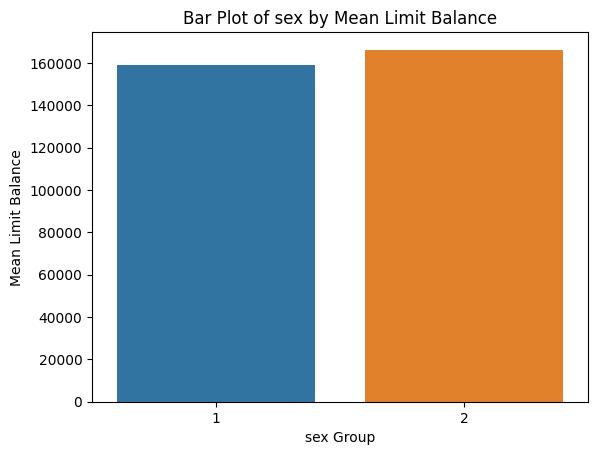

In [15]:
# Menggabungkan kolom "age_group" dan "limit_balance" menjadi DataFrame baru
data_plot = pd.concat([Data['sex'], Data['limit_balance']], axis=1)

# Menghitung nilai rata-rata pada kolom "limit_balance" berdasarkan "age_group"
mean_balance = data_plot.groupby('sex')['limit_balance'].mean().reset_index()

# Membuat bar plot
sns.barplot(x='sex', y='limit_balance', data=mean_balance)

# Menambahkan label dan judul
plt.xlabel("sex Group")
plt.ylabel("Mean Limit Balance")
plt.title("Bar Plot of sex by Mean Limit Balance")

# Menampilkan plot
plt.show()


Pada bar plot diatas menunjukan bahwa laki2 (1) memiliki limit balance yang lebih rendah dibandingkan perempuan (2).

In [16]:
Data['default_payment_next_month'].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [17]:
Data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month', 'age_group'],
      dtype='object')

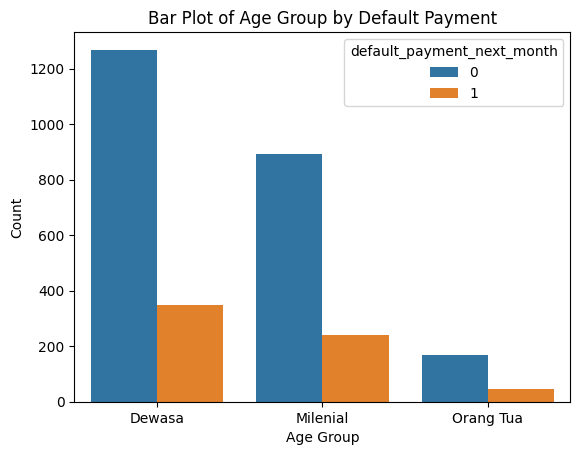

In [18]:
# Menggabungkan kolom "age_group" dan "default_payment_next_month" menjadi DataFrame baru
data_plot = pd.concat([Data['age_group'], Data['default_payment_next_month']], axis=1)

# Menghitung jumlah pengamatan untuk setiap nilai unik dalam kolom "default_payment_next_month" berdasarkan "age_group"
count_values = data_plot.groupby(['age_group', 'default_payment_next_month']).size().reset_index(name='count')

# Membuat bar plot
sns.barplot(x='age_group', y='count', hue='default_payment_next_month', data=count_values)

# Menambahkan label dan judul
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Bar Plot of Age Group by Default Payment")

# Menampilkan plot
plt.show()


In [19]:
Data['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: Int64

Berdasarkan output tersebut dapat dilihat bahwa target memiliki data yang imbalance yang dapat dilihat jumlah data kategori 0 memiliki total 2330 orang dan kategori 1 memiliki total 635 orang.

# **FEATURE ENGGINEERING**

In [20]:
#split data
X = Data.drop(['sex', 'education_level', 'marital_status', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6','default_payment_next_month','age_group'], axis=1)
y = Data['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2075, 7)
(890, 7)
(2075,)
(890,)


Seperti yang sudah dijelaskan pada kolom phix matrix kita telah memilih fitur berdasarkan nilai korelasi dan saya membuat tresshold sebesar 0,1. Maka dari itu fitur yang memiliki korelasi rendah terhadap target (default payment next month) kita drop dan tidak digunakan untuk menjadi  fitur.Sehingga kita memiliki 7 fitur yaitu limit_balance serta pay_0 hingga pay_6

In [21]:
#VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
calc_vif(X_train)

,variables,VIF
0,limit_balance,1.114767
1,pay_0,1.831959
2,pay_2,3.215802
3,pay_3,3.520115
4,pay_4,4.266558
5,pay_5,4.800100
6,pay_6,3.057012


Berdasarkan perhitungan vif diatas tidak ada kolom yang memiliki nilai vif yang tinggi di data yang telah di split. Hal ini menunjukan kita tidak perlu melakukan handling lagi.

In [23]:
X_train.columns

Index(['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], dtype='object')

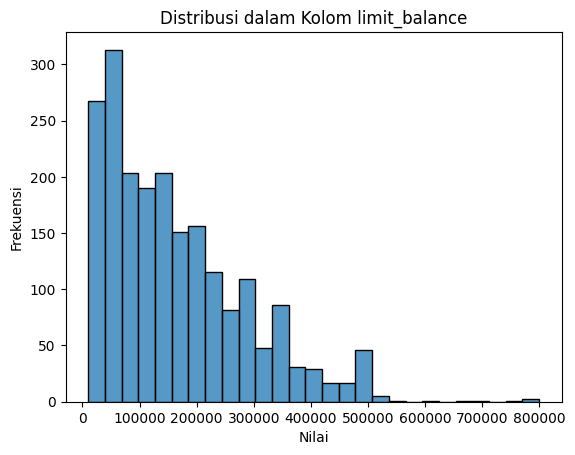

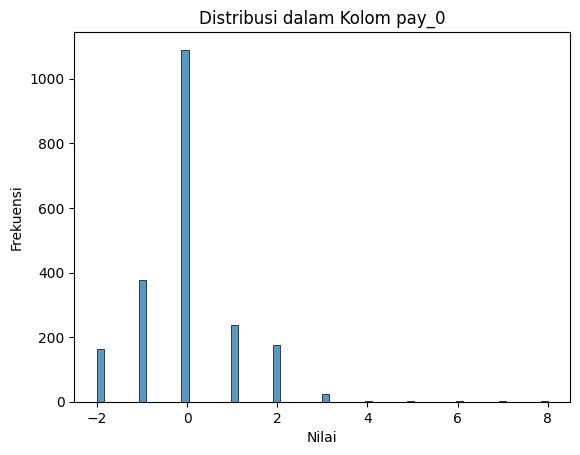

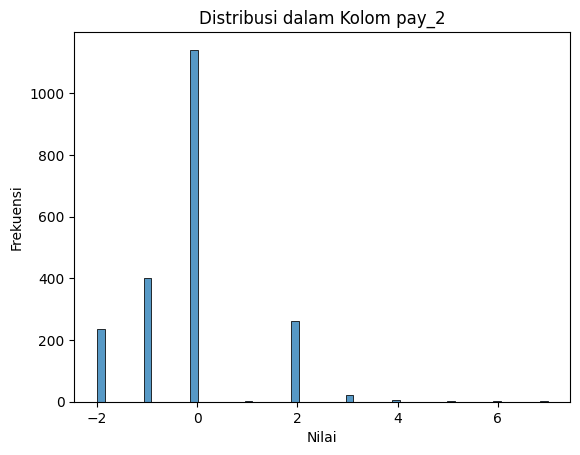

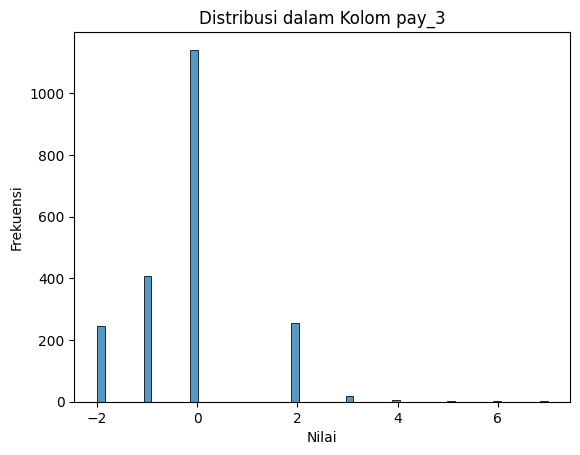

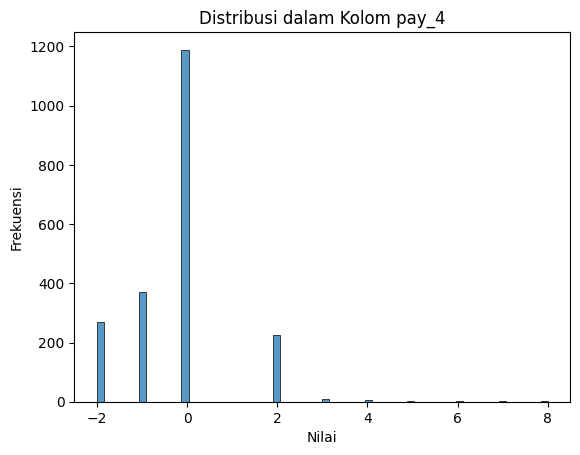

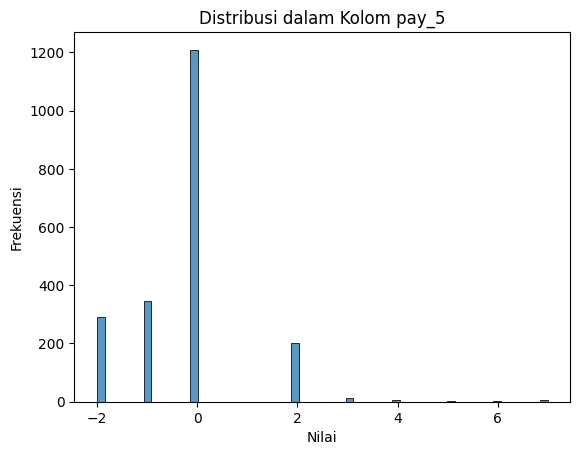

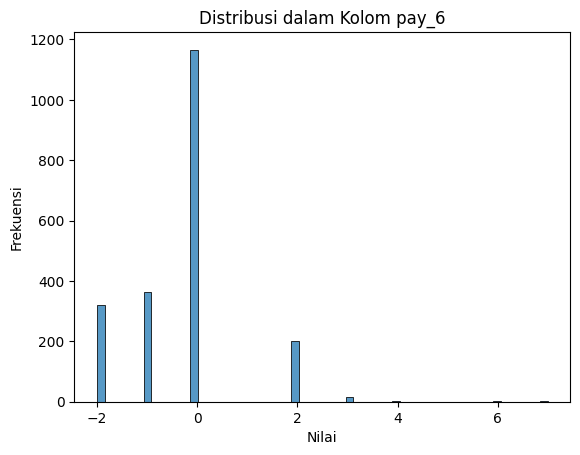

In [24]:
for col in X_train.columns:
    # Menampilkan histogram menggunakan histplot
    sns.histplot(data=X_train, x=col)

    # Menambahkan judul dan label sumbu
    plt.title(f'Distribusi dalam Kolom {col}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')

    # Menampilkan plot
    plt.show()

Berdasarkan histogram plot diatas dapat dilihat skew dari fitur yang kita miliki. Untuk kolom limit balance memiliki distribusi right skew sedangkan kolom lain memiliki distribusi normal.

In [25]:
# Outlier detection in Age
Q1 = X_train['limit_balance'].quantile(.25)
Q3 = X_train['limit_balance'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = X_train[(X_train['limit_balance'] <= lower) | (X_train['limit_balance'] >= upper)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.0 %
upper:  810000.0
lower:  -520000.0


Pada kode diatas menggunakan IQR untuk mendeteksi apakah kolom limit_balance memiliki outlier. Berdasarkan output diatas percentage dari limit_balance adalah 0.0%, hal ini berarti kolom limit_balance tidak memiliki outlier sehingga  kita tidak perlu melakukan handling outliers.

In [26]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

num_tr_2 = num_pipeline.fit_transform(X_train[['limit_balance']])
num_tr_2

array([[-1.06414554],
       [-1.06414554],
       [-0.58606341],
       ...,
       [-1.22350625],
       [ 0.05137943],
       [-0.90478483]])

Kode diatas digunakan untuk membuaat pipeline dengan isi melakukan scaling terhadap kolom limit_balance. Scaling yang digunakan adalah standard scaler.

Disini saya hanya mengatur/handling untuk kolom limit_balance dengan menggunakan scaler. Saya tidak melakukan encode dikarenakan semua kolom sudah numerik,dan tidak menggunakan simple imputer dikarenakan tidak adanya missing value. Lalu kenapa cmn kolom limit balance? karena data yang benar2 numerikal hanya limit_balance, sisanya memang numerik namun dia bersifat kategorikal maka dari itu tidak bisa di scale.

In [27]:
# Apply the full pipeline on the training data
train_tr = num_pipeline.fit_transform(X_train)

In [28]:
test_tr = num_pipeline.transform(X_test)
test_tr

array([[ 1.32626511e+00, -1.83379106e+00, -1.61821287e+00, ...,
        -1.56924209e+00, -1.55957512e+00, -1.52031545e+00],
       [-9.04784834e-01,  9.17558508e-01,  1.81423457e+00, ...,
         1.47698241e-01,  1.90707552e+00,  1.94443421e+00],
       [ 5.29461560e-01,  9.17558508e-01,  1.81423457e+00, ...,
         1.47698241e-01,  1.73750200e-01,  2.12059377e-01],
       ...,
       [ 2.90420495e-01, -9.16674540e-01,  1.81423457e+00, ...,
        -1.56924209e+00, -1.55957512e+00, -6.54128039e-01],
       [ 5.29461560e-01, -9.16674540e-01, -7.60101010e-01, ...,
        -7.10771927e-01, -6.92912458e-01, -6.54128039e-01],
       [-9.04784834e-01,  4.41983867e-04,  9.80108484e-02, ...,
         1.47698241e-01, -6.92912458e-01,  2.12059377e-01]])

# **MODEL DEFINITION**

**ASUMSI**


> Terdapat 2 unique value di target yaitu 0 merupakan orang yang berhasil melakukan pembayaran sedangkan 0 untuk orang yang tidak berhasil melakukan pembayaran.


> True positive yang saya ambil adalah 0 atau berfokus kepada orang yang berhasil melakukan pembayaran, sehingga true negative saya merupakan yang kategori 1 atau yang tidak berhasil melakukan pembayaran. Maka dari itu false negativenya menjadi orang yang diprediksi tidak berhasil melakukan pembayaran tpi nilai aslinya berhasil bayar dan false positive nya adalah orang yang diprediksi berhasil membayar namun nilai aslinya tidak berhasil.



> Berdasarkan asumsi yang telah dibuat diatas, asumsi tersebut digunakan untuk memilih matriks evaluasi apa yang digunakan untuk evaluation model. Pada kasus ini saya tidak bisa memilih untuk meminimalisir false negative maupun false positive karena menurut saya kedua hal tersebut sama fatalnya sehingga di kondisi tersebut saya menggunakan nilai F1 Score untuk melakukan evaluasi.





**LOGREG**

In [29]:
logreg = LogisticRegression(random_state=0)

In [30]:
logreg.fit(train_tr, y_train)

lr_train = logreg.predict(train_tr)
lr_test = logreg.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      1631
         1.0       0.76      0.28      0.41       444

    accuracy                           0.83      2075
   macro avg       0.80      0.63      0.66      2075
weighted avg       0.82      0.83      0.80      2075

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       699
         1.0       0.74      0.32      0.45       191

    accuracy                           0.83       890
   macro avg       0.79      0.64      0.67       890
weighted avg       0.82      0.83      0.80       890



In [31]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(logreg, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.88007554 0.88007554 0.88007554 0.88409091 0.88007554]
Mean F1 Score (Kategori 0): 0.880878616190231


pada bagian ini saya melakukan pemodelan dengan menggunakan model logistic regression. Setelah melakukan prediksi dengan model logistic regression tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.88 atau 88%

Confusion Matrix (Training Data):
[[1592   39]
 [ 318  126]]
Confusion Matrix (Testing Data):
[[678  21]
 [130  61]]


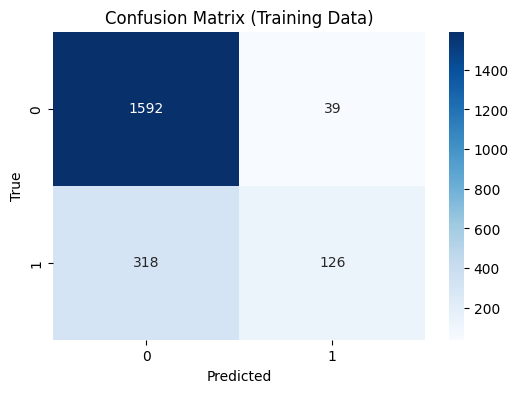

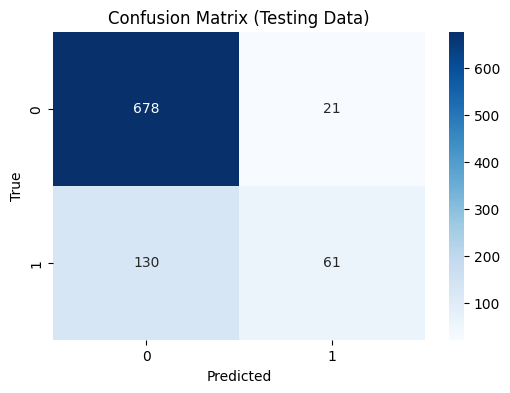

In [32]:
# Make predictions on training and testing data
lr_train_pred = logreg.predict(train_tr)
lr_test_pred = logreg.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1592
*   False Positive =318
*   False Negative = 39
*   True negative =126

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =678
*   False Positive =21
*   False Negative = 130
*   True negative =61



**SVM**

In [33]:
svc = SVC(random_state=0)

In [34]:
svc.fit(train_tr, y_train)

svc_train = svc.predict(train_tr)
svc_test = svc.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1631
         1.0       0.74      0.46      0.56       444

    accuracy                           0.85      2075
   macro avg       0.80      0.71      0.74      2075
weighted avg       0.84      0.85      0.83      2075

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       699
         1.0       0.71      0.43      0.53       191

    accuracy                           0.84       890
   macro avg       0.78      0.69      0.72       890
weighted avg       0.83      0.84      0.82       890



In [35]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(svc, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.88007554 0.88007554 0.88007554 0.88007554 0.88007554]
Mean F1 Score (Kategori 0): 0.8800755429650614


pada bagian ini saya melakukan pemodelan dengan menggunakan model SVM. Setelah melakukan prediksi dengan model SVM tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.88 atau 88% hampir sama seperti dengan menggunakan model logistic regression.

Confusion Matrix (Training Data):
[[1558   73]
 [ 241  203]]
Confusion Matrix (Testing Data):
[[665  34]
 [109  82]]


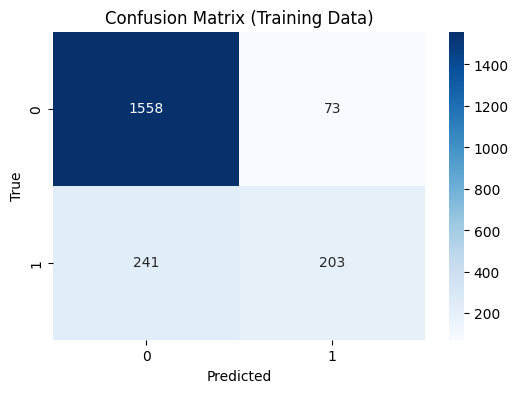

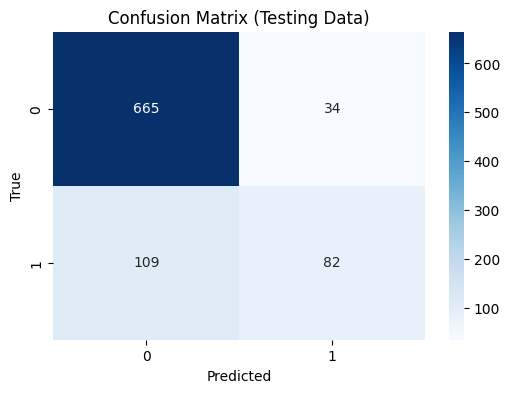

In [36]:
# Make predictions on training and testing data
lr_train_pred = svc.predict(train_tr)
lr_test_pred = svc.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1558
*   False Positive =73
*   False Negative = 241
*   True negative =203

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =665
*   False Positive =34
*   False Negative = 109
*   True negative =82


**Decision Tree**

In [37]:
dtc = DecisionTreeClassifier(random_state=0)

In [38]:
dtc.fit(train_tr, y_train)

dtc_train = dtc.predict(train_tr)
dtc_test = dtc.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1631
         1.0       0.94      0.66      0.78       444

    accuracy                           0.92      2075
   macro avg       0.93      0.83      0.86      2075
weighted avg       0.92      0.92      0.91      2075

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       699
         1.0       0.48      0.40      0.44       191

    accuracy                           0.78       890
   macro avg       0.66      0.64      0.65       890
weighted avg       0.77      0.78      0.77       890



In [39]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(dtc, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.88568684 0.88469185 0.75902212 0.74603175 0.8659595 ]
Mean F1 Score (Kategori 0): 0.8282784103623759


pada bagian ini saya melakukan pemodelan dengan menggunakan model decision tree. Setelah melakukan prediksi dengan model decision tree tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.82 atau 82%. Hal ini menunjukan decision tree sedikit kurang baik dibandingkan dengan model SVM dan Logistic regression.

Confusion Matrix (Training Data):
[[1613   18]
 [ 150  294]]
Confusion Matrix (Testing Data):
[[618  81]
 [115  76]]


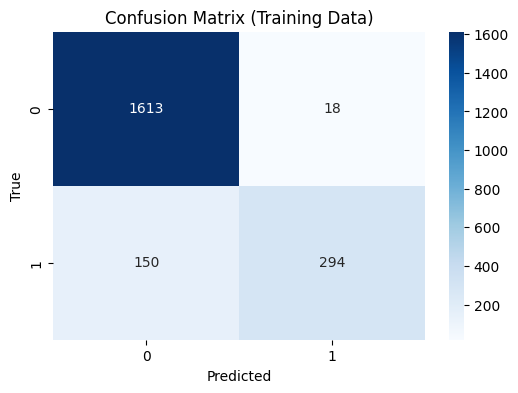

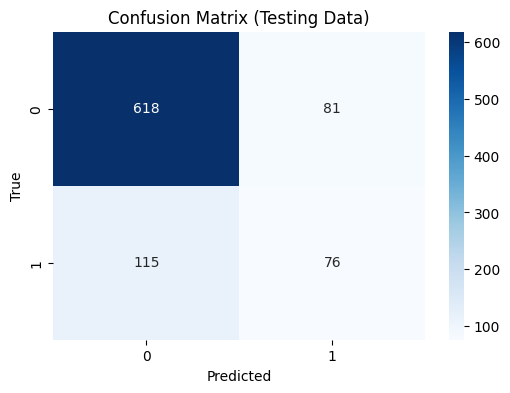

In [40]:
# Make predictions on training and testing data
lr_train_pred = dtc.predict(train_tr)
lr_test_pred = dtc.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1613
*   False Positive =18
*   False Negative = 150
*   True negative =294

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =618
*   False Positive =81
*   False Negative = 115
*   True negative =76


**Random Forest**

In [41]:
rfc = RandomForestClassifier(random_state=0)

In [42]:
rfc.fit(train_tr, y_train)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1631
         1.0       0.90      0.70      0.79       444

    accuracy                           0.92      2075
   macro avg       0.91      0.84      0.87      2075
weighted avg       0.92      0.92      0.92      2075

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       699
         1.0       0.59      0.45      0.51       191

    accuracy                           0.81       890
   macro avg       0.72      0.68      0.70       890
weighted avg       0.80      0.81      0.80       890



In [43]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(rfc, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.88760807 0.89314516 0.806271   0.72289157 0.87666034]
Mean F1 Score (Kategori 0): 0.8373152269832327


pada bagian ini saya melakukan pemodelan dengan menggunakan model random forest classifier atau RFC. Setelah melakukan prediksi dengan model tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.83 atau 83%. Hal ini menunjukan model random forest tidak lebih baik dibandingkan SVM dan Logistic regression namun sedikit lebih baik dibandingkan decision tree.

Confusion Matrix (Training Data):
[[1597   34]
 [ 134  310]]
Confusion Matrix (Testing Data):
[[638  61]
 [105  86]]


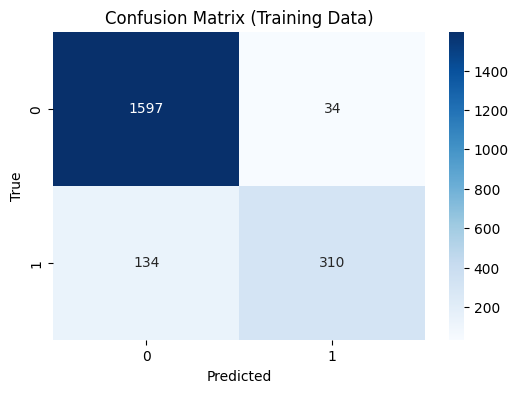

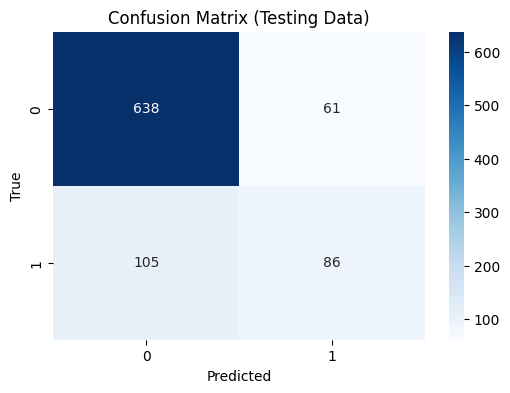

In [44]:
# Make predictions on training and testing data
lr_train_pred = rfc.predict(train_tr)
lr_test_pred = rfc.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1597
*   False Positive =34
*   False Negative = 134
*   True negative =310

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =638
*   False Positive =61
*   False Negative = 105
*   True negative =86


**KNN**

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
knn.fit(train_tr, y_train)

KNeighborsClassifier()

In [47]:
knn_train = knn.predict(train_tr)
knn_test = knn.predict(test_tr)
print("Classification Report (Training Data):")
print(classification_report(y_train, knn_train))

Classification Report (Training Data):
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1631
         1.0       0.72      0.50      0.59       444

    accuracy                           0.85      2075
   macro avg       0.80      0.72      0.75      2075
weighted avg       0.84      0.85      0.84      2075



In [48]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(knn, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.87962085 0.88715953 0.84842105 0.84897025 0.87855787]
Mean F1 Score (Kategori 0): 0.8685459130530268


pada bagian ini saya melakukan pemodelan dengan menggunakan model K-Nearest Neighbour atau KNN. Setelah melakukan prediksi dengan model tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.86 atau 86%. Hal ini menunjukan model KNN tidak lebih baik dibandingkan SVM dan Logistic regression namun lebih baik dibandingkan Random forest dan Decision tree.

Confusion Matrix (Training Data):
[[1543   88]
 [ 222  222]]
Confusion Matrix (Testing Data):
[[645  54]
 [111  80]]


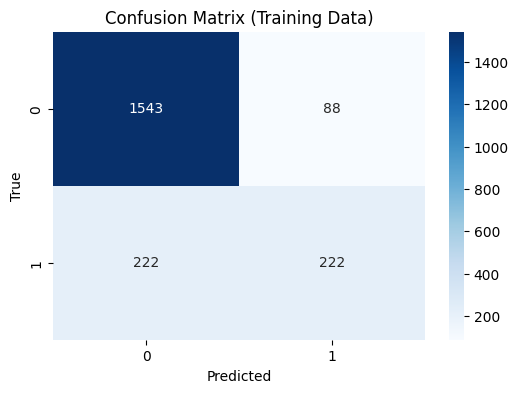

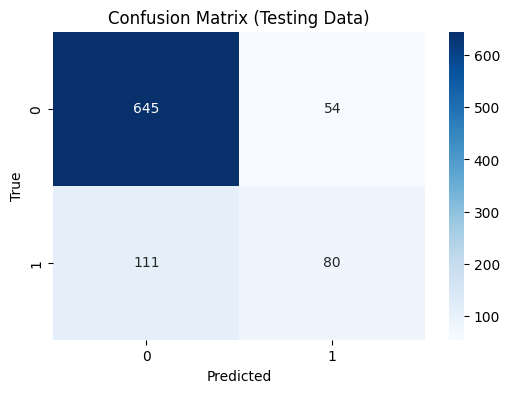

In [49]:
# Make predictions on training and testing data
lr_train_pred = knn.predict(train_tr)
lr_test_pred = knn.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1543
*   False Positive =88
*   False Negative = 222
*   True negative =222

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =645
*   False Positive =54
*   False Negative = 111
*   True negative =80


**Naive Bayes**

In [50]:
nb = GaussianNB()

In [51]:
nb.fit(train_tr, y_train)
nb_train = nb.predict(train_tr)
nb_test = nb.predict(test_tr)
print("Classification Report (Training Data):")
print(classification_report(y_train, nb_train))

print("Classification Report (Test Data):")
print(classification_report(y_test, nb_test))

Classification Report (Training Data):
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1631
         1.0       0.60      0.45      0.52       444

    accuracy                           0.82      2075
   macro avg       0.73      0.68      0.70      2075
weighted avg       0.80      0.82      0.81      2075

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       699
         1.0       0.56      0.44      0.49       191

    accuracy                           0.81       890
   macro avg       0.71      0.67      0.69       890
weighted avg       0.79      0.81      0.80       890



In [52]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(nb, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.88007554 0.88007554 0.88007554 0.87984863 0.88007554]
Mean F1 Score (Kategori 0): 0.8800301600106488


pada bagian ini saya melakukan pemodelan dengan menggunakan model Naive bayes. Setelah melakukan prediksi dengan model tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.88 atau 88%. Hal ini menunjukan model naive bayes sama baiknya seperti model SVM dan logistic regression.

Confusion Matrix (Training Data):
[[1499  132]
 [ 244  200]]
Confusion Matrix (Testing Data):
[[633  66]
 [107  84]]


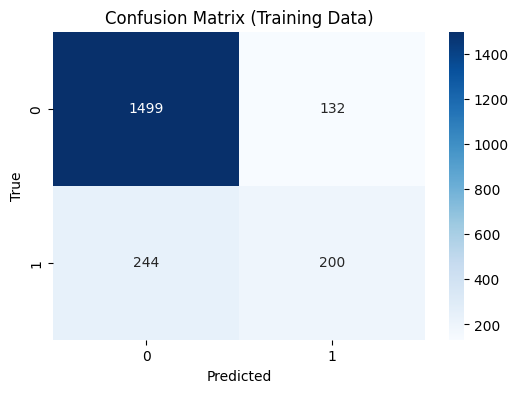

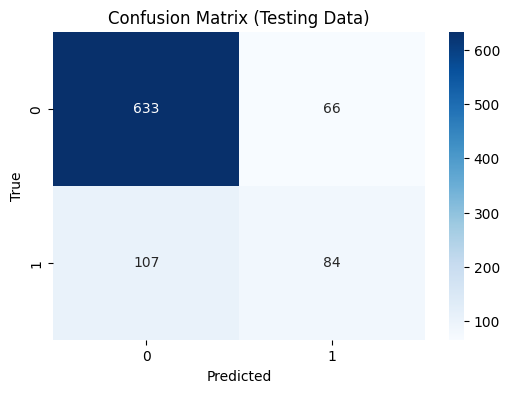

In [53]:
# Make predictions on training and testing data
lr_train_pred = nb.predict(train_tr)
lr_test_pred = nb.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1499
*   False Positive =132
*   False Negative = 244
*   True negative =200

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =633
*   False Positive =66
*   False Negative = 107
*   True negative =84


**XG BOOST**

In [54]:
# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier()

# Melatih model XGBoost
xgb_model.fit(train_tr, y_train)

# Memprediksi label pada data pelatihan dan data uji
xgb_train = xgb_model.predict(train_tr)
xgb_test = xgb_model.predict(test_tr)

# Menampilkan laporan klasifikasi untuk data pelatihan dan data uji
print("Classification Report (Training Data):")
print(classification_report(y_train, xgb_train))

print("Classification Report (Test Data):")
print(classification_report(y_test, xgb_test))

Classification Report (Training Data):
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1631
         1.0       0.88      0.58      0.70       444

    accuracy                           0.89      2075
   macro avg       0.89      0.78      0.82      2075
weighted avg       0.89      0.89      0.89      2075

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       699
         1.0       0.60      0.38      0.46       191

    accuracy                           0.81       890
   macro avg       0.72      0.65      0.67       890
weighted avg       0.79      0.81      0.80       890



In [55]:
# Membuat scorer dengan f1 score pada kategori 0
scorer = make_scorer(f1_score, pos_label=0)

# Melakukan validasi silang hanya untuk skor f1 score pada kategori 0
scores = cross_val_score(xgb_model, X, y, scoring=scorer, cv=5)

# Menampilkan skor f1 score pada kategori 0
print("F1 Scores (Kategori 0):")
print(scores)
print("Mean F1 Score (Kategori 0):", scores.mean())

F1 Scores (Kategori 0):
[0.88590604 0.91037261 0.78794643 0.73614776 0.8753568 ]
Mean F1 Score (Kategori 0): 0.8391459274796693


pada bagian ini saya melakukan pemodelan dengan menggunakan model XGBoost. Setelah melakukan prediksi dengan model tersebut saya melakukan cross validation dan dilihat hasil cross validation dengan rata2 f1 score yang ada pada kategori 0. Berdasarkan hasil tersebut dapat dilihat bahwa rata2 dari f1 score dengan menggunakan model ini memiliki score sebesar 0.83 atau 83%. Hal ini menunjukan model XGBoost ini tidak lebih baik dibandingkan model svm,logreg dan naive bayes.

Confusion Matrix (Training Data):
[[1597   34]
 [ 186  258]]
Confusion Matrix (Testing Data):
[[651  48]
 [119  72]]


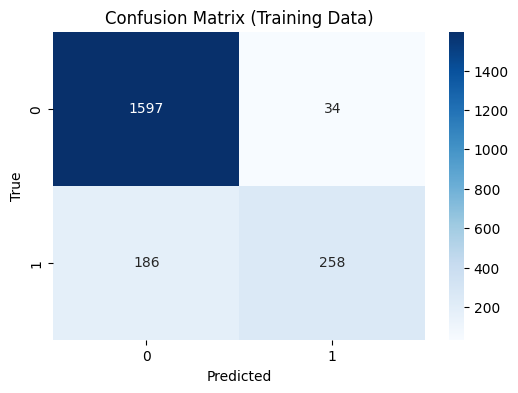

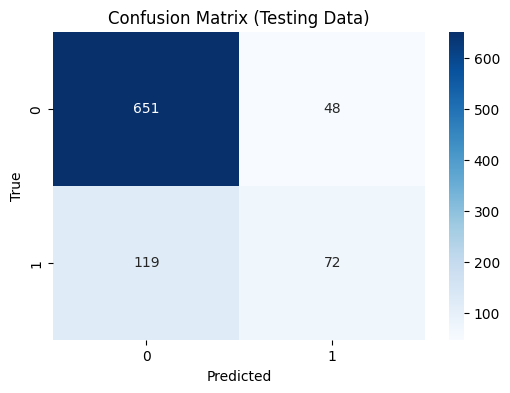

In [56]:
# Make predictions on training and testing data
lr_train_pred = xgb_model.predict(train_tr)
lr_test_pred = xgb_model.predict(test_tr)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Create confusion matrix for testing data
test_cm = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix (Testing Data):")
print(test_cm)

# Plot confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data)')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

Berdasarkan confusion matrix diatas pada data train dapat dilihat bahwa:

*   True Positive =1597
*   False Positive =34
*   False Negative = 186
*   True negative =258

Berdasarkan confusion matrix diatas pada data test dapat dilihat bahwa:

*   True Positive =651
*   False Positive =48
*   False Negative = 119
*   True negative =72


# **HYPERPARAMETER TUNING**

In [57]:
# Tentukan ruang parameter yang akan dieksplorasi dalam Grid Search
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Inisialisasi objek Grid Search
model = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Melakukan penyetelan hiperparameter pada data pelatihan
model.fit(X_train, y_train)

# Menampilkan hasil penyetelan hiperparameter terbaik
print("Best Parameters:", model.best_params_)
print("Best Score:", model.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8269879518072288


Pada hyperparameter tuning ini saya menggunakan model logistic regression karena model tersebut memiliki nilai f1 score rata2 tertinggi dibandingkan model lain. Hyperparameter tuning ini dilakukan untuk harapan akan meningkatkan score dari model yang kita buat namun kenyataannya model yang dengan menggunakan hyperparameter tuning tidak lebih baik dibandingkan sebelum dilakukan tuning.

# **MODEL SAVING**


In [58]:
TanpaTuning = Pipeline([
    ("preprocess", num_pipeline),
    ("classification", logreg)
])

Dikarenakan hasil tuning membuat model menjadi kurang bagus, maka saya melakukan save model terhadap model yang tidak dilakukan tuning.

In [59]:
DenganTuning = Pipeline([
    ("preprocess", num_pipeline),
    ("classification", model)
])


In [60]:
TanpaTuning

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classification', LogisticRegression(random_state=0))])

In [61]:
DenganTuning

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classification',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10],
                                          'penalty': ['l1', 'l2'],
                                          'solver': ['liblinear']},
                              scoring='accuracy'))])

In [62]:
#Save model
pickle.dump(TanpaTuning, open('ModelM1_logreg.pkl', 'wb'))
pickle.dump(DenganTuning, open('ModelM1_TuningCV.pkl', 'wb'))


# **KESIMPULAN**

**Kesimpulan Bisnis:** Berdasarkan data default_payment yang berhasil melakukan pembayaran memiliki data yang sangat tinggi dibandingkan yang tidak berhasil. Hal ini menunjukan hal positif untuk perusahaan. Lalu berdasarkan visualisasi yang dilakukan di EDA dapat dilihat bahwa rata2 limit balance yang ada di setiap group umur. Dapat dilihat bahwa limit_balance yang ada pada kategori dewasa memiliki limit tertinggi, disusul oleh orang tua dan milenial memiliki limit rata2 paling rendah.

**Kesimpulan Teknis :** Berdasarkan hasil cross validation dapat dilihat bahwa model logistic regression memiliki score yang paling baik dibandingkan model2 lainnya. namun, saat dilakukan hyperparameter tuning, ketepatan model menjadi turun dibandingkan sebelum dilakukan hyperparameter tuning.